<a href="https://www.kaggle.com/code/ignacioazua/quality-of-life-index-analysis-random-forest-ml?scriptVersionId=225444313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Introduction

In this analysis, we aim to determine the most influential factors affecting the Quality of Life Index using a Random Forest regression model. The dataset includes various economic, environmental, and social indicators, such as purchasing power, pollution, safety, healthcare, cost of living, and commute times. By leveraging machine learning, we identify which factors contribute the most to quality of life, helping policymakers and researchers understand key areas for improvement.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os
import scipy.stats as stats
import statsmodels.api as sm
import plotly.express as px
from statsmodels.formula.api import ols
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quality-of-life-index-by-country/quality_of_life_indices_by_country.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/quality-of-life-index-by-country/quality_of_life_indices_by_country.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015


In [4]:
# Display the last few rows of the dataset
df.tail()

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
1490,79,Peru,84.6,34.8,32.7,56.3,30.0,18.3,48.9,82.5,97.7,2024/2
1491,80,Iran,80.4,26.0,49.7,52.5,26.4,23.4,46.4,75.3,71.0,2024/2
1492,81,Sri Lanka,75.2,17.5,57.9,71.0,34.6,39.1,54.6,58.5,59.1,2024/2
1493,82,Bangladesh,72.6,33.1,38.4,42.2,22.5,12.3,57.6,85.6,71.3,2024/2
1494,83,Nigeria,42.7,11.0,33.3,48.2,31.4,23.9,64.2,88.2,60.8,2024/2


In [5]:
# Check the shape of the dataset
df.shape

# Get basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 
dtypes: float64(8), int64(1), object(3)

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,38.733779,134.156656,66.804615,60.104682,65.211037,53.440401,12.876856,35.792508,52.431237
std,22.931071,40.828402,33.282943,13.776743,10.150324,20.573712,8.475637,7.905525,20.660280
min,1.000000,-53.000000,3.300000,14.700000,28.300000,17.600000,2.600000,11.800000,11.500000
25%,19.000000,105.350000,38.350000,52.700000,57.600000,36.900000,8.400000,29.900000,33.750000
50%,38.000000,136.200000,60.700000,59.900000,66.400000,49.200000,11.100000,34.900000,56.100000
75%,57.000000,165.700000,91.800000,70.700000,73.250000,69.100000,14.700000,40.250000,67.650000
max,87.000000,285.800000,210.000000,88.100000,88.400000,138.200000,202.100000,65.200000,96.600000


In [6]:
df.columns

Index(['Rank', 'Country', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Climate Index', 'Year'],
      dtype='object')

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

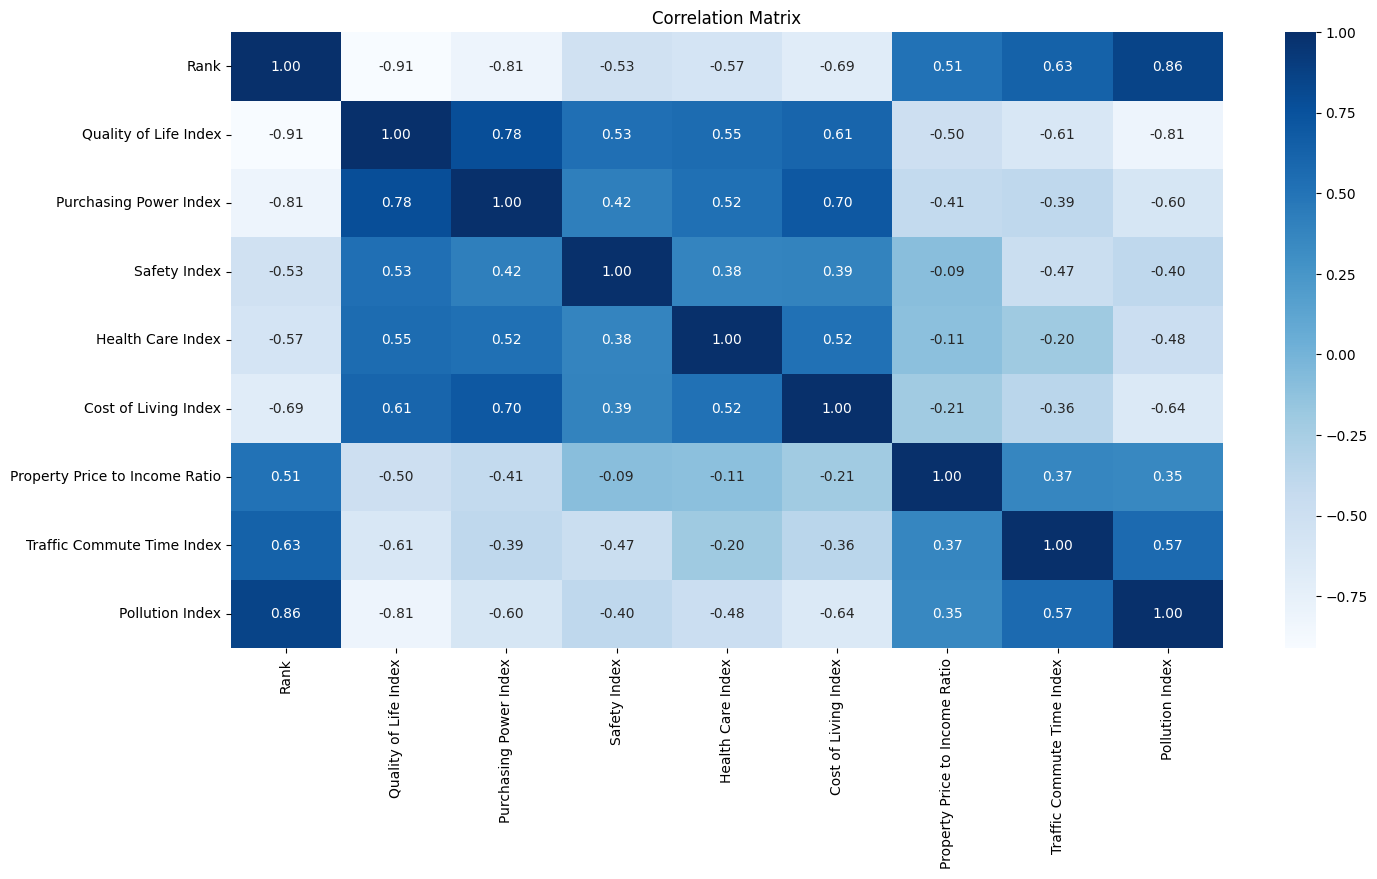

In [8]:
# Analyze the correlation between different indices
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
continent_mapping =    {

    'Switzerland': 'Europe',
    'Germany': 'Europe',
    'Sweden': 'Europe',
    'United States': 'North America',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Austria': 'Europe',
    'Australia': 'Oceania',
    'Canada': 'North America',
    'New Zealand': 'Oceania',
    'Norway': 'Europe',
    'Saudi Arabia': 'Asia',
    'Japan': 'Asia',
    'Netherlands': 'Europe',
    'Turkmenistan': 'Asia',
    'United Kingdom': 'Europe',
    'Cyprus': 'Europe',
    'United Arab Emirates': 'Asia',
    'Ireland': 'Europe',
    'Qatar': 'Asia',
    'Estonia': 'Europe',
    'France': 'Europe',
    'Belgium': 'Europe',
    'Spain': 'Europe',
    'Slovenia': 'Europe',
    'Portugal': 'Europe',
    'Czech Republic': 'Europe',
    'Puerto Rico': 'North America',
    'Kuwait': 'Asia',
    'Israel': 'Asia',
    'South Korea': 'Asia',
    'Lithuania': 'Europe',
    'Croatia': 'Europe',
    'Singapore': 'Asia',
    'South Africa': 'Africa',
    'Poland': 'Europe',
    'Slovakia': 'Europe',
    'Italy': 'Europe',
    'Latvia': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Uruguay': 'South America',
    'Taiwan': 'Asia',
    'Panama': 'North America',
    'Malaysia': 'Asia',
    'Mexico': 'North America',
    'Bahrain': 'Asia',
    'Romania': 'Europe',
    'Hong Kong': 'Asia',
    'Turkey': 'Asia',
    'India': 'Asia',
    'Argentina': 'South America',
    'Bosnia And Herzegovina': 'Europe',
    'Belarus': 'Europe',
    'Bulgaria': 'Europe',
    'Chile': 'South America',
    'Georgia': 'Asia',
    'Serbia': 'Europe',
    'Sri Lanka': 'Asia',
    'Armenia': 'Asia',
    'Colombia': 'South America',
    'Thailand': 'Asia',
    'Kazakhstan': 'Asia',
    'Ecuador': 'South America',
    'Dominican Republic': 'North America',
    'Moldova': 'Europe',
    'Jordan': 'Asia',
    'Philippines': 'Asia',
    'Lebanon': 'Asia',
    'Brazil': 'South America',
    'North Macedonia': 'Europe',
    'Russia': 'Europe',
    'Indonesia': 'Asia',
    'Pakistan': 'Asia',
    'Ukraine': 'Europe',
    'China': 'Asia',
    'Kenya': 'Africa',
    'Bolivia': 'South America',
    'Nigeria': 'Africa',
    'Iran': 'Asia',
    'Cambodia': 'Asia',
    'Bangladesh': 'Asia',
    'Egypt': 'Africa',
    'Vietnam': 'Asia',
    'Mongolia': 'Asia',
    'Venezuela': 'South America',
    'Iceland': 'Europe',
    'Oman': 'Asia',
    'Luxembourg': 'Europe',
    'Costa Rica': 'North America',
    'Tunisia': 'Africa',
    'Malta': 'Europe',
    'Azerbaijan': 'Asia',
    'Peru': 'South America',
    'Morocco': 'Africa',
    'Sri Lanka': 'Asia',
    'Kenya': 'Africa',
    'Bangladesh': 'Asia',
    'Nigeria': 'Africa',
    'Iran': 'Asia',
    'Cambodia': 'Asia',
    'Bangladesh': 'Asia',
    'Egypt': 'Africa',
    'Vietnam': 'Asia',
    'Mongolia': 'Asia',
    'Venezuela': 'South America',
    'Iceland': 'Europe',
    'Oman': 'Asia',
    'Luxembourg': 'Europe',
    'Costa Rica': 'North America',
    'Tunisia': 'Africa',
    'Malta': 'Europe',
    'Azerbaijan': 'Asia',
    'Peru': 'South America',
    'Morocco': 'Africa'
    
}

In [10]:
# Convert 'Climate Index' to numeric (replace '-' with NaN)
df["Climate Index"] = pd.to_numeric(df["Climate Index"], errors='coerce')

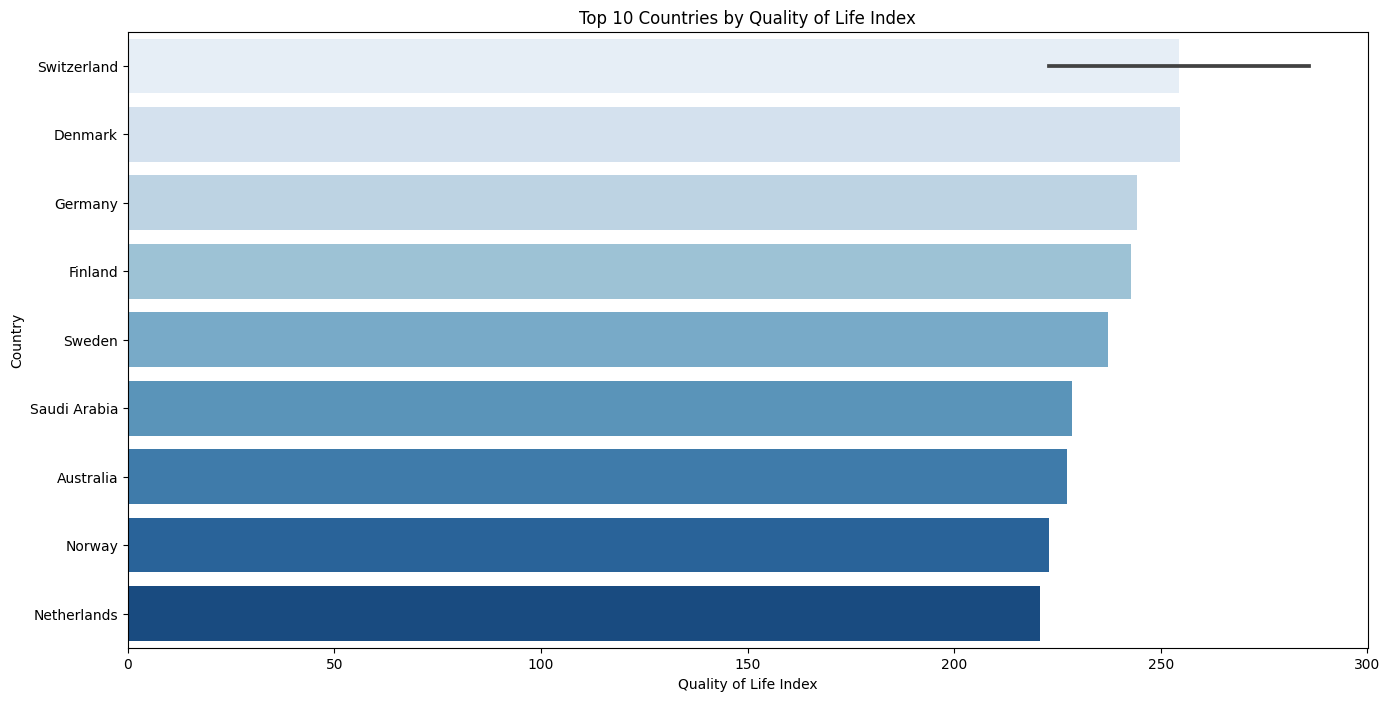

In [11]:
# Analyze the top 10 countries with the highest Quality of Life Index
fig, ax = plt.subplots(figsize=(16, 8))
top_10_countries = df.sort_values(by='Quality of Life Index', ascending=False).head(10)
sns.barplot(x='Quality of Life Index', y='Country', data=top_10_countries, palette='Blues')
plt.title('Top 10 Countries by Quality of Life Index')
plt.show()

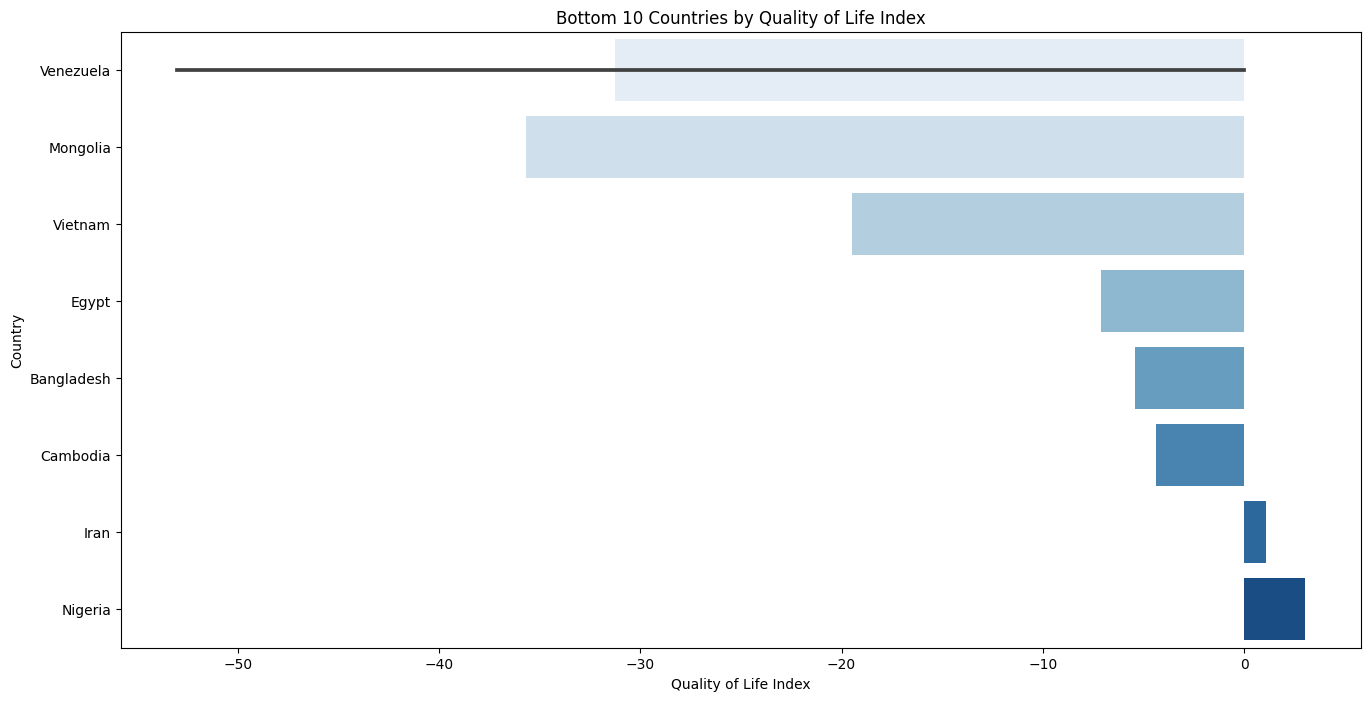

In [12]:
# Analyze the bottom 10 countries with the lowest Quality of Life Index
fig, ax = plt.subplots(figsize=(16, 8))
bottom_10_countries = df.sort_values(by='Quality of Life Index', ascending=True).head(10)
sns.barplot(x='Quality of Life Index', y='Country', data=bottom_10_countries, palette='Blues')
plt.title('Bottom 10 Countries by Quality of Life Index')
plt.show()

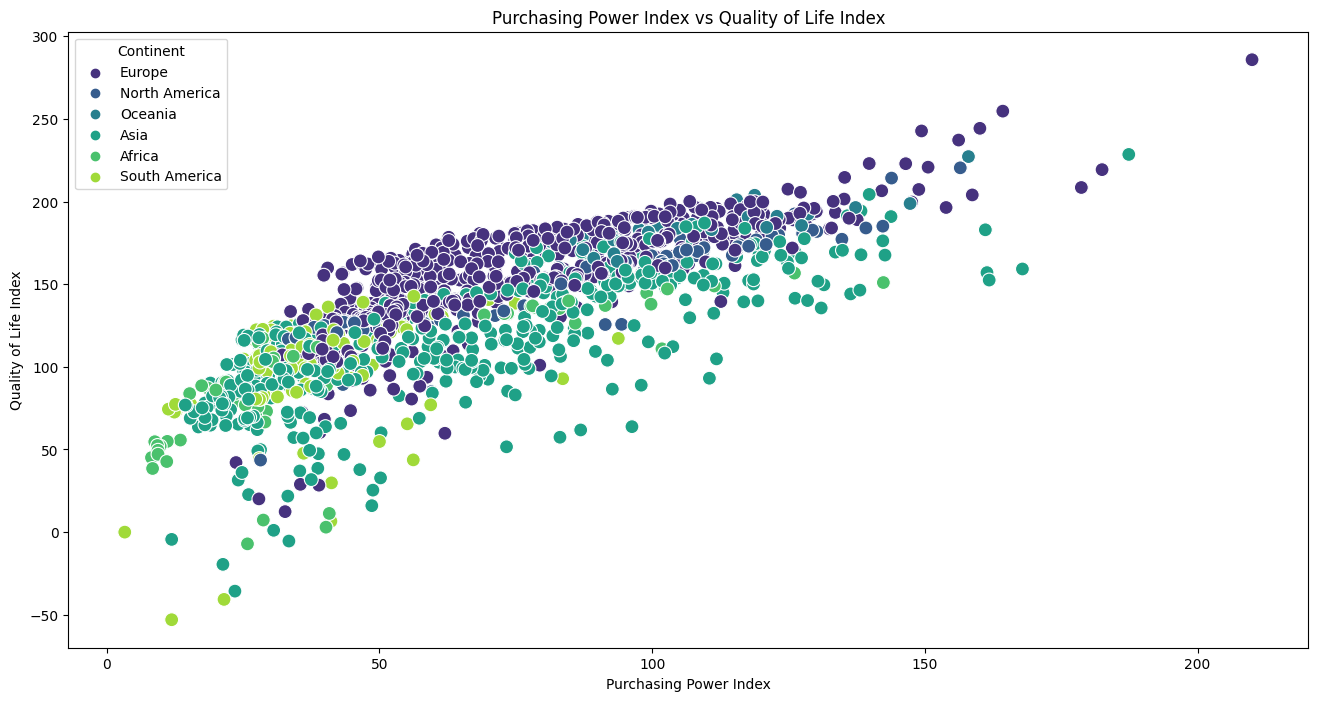

In [13]:
df['Continent'] = df['Country'].map(continent_mapping)

# Visualize the relationship between Purchasing Power Index and Quality of Life Index
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x='Purchasing Power Index', y='Quality of Life Index', data=df, hue='Continent', palette='viridis', s=100)
plt.title('Purchasing Power Index vs Quality of Life Index')
plt.show()

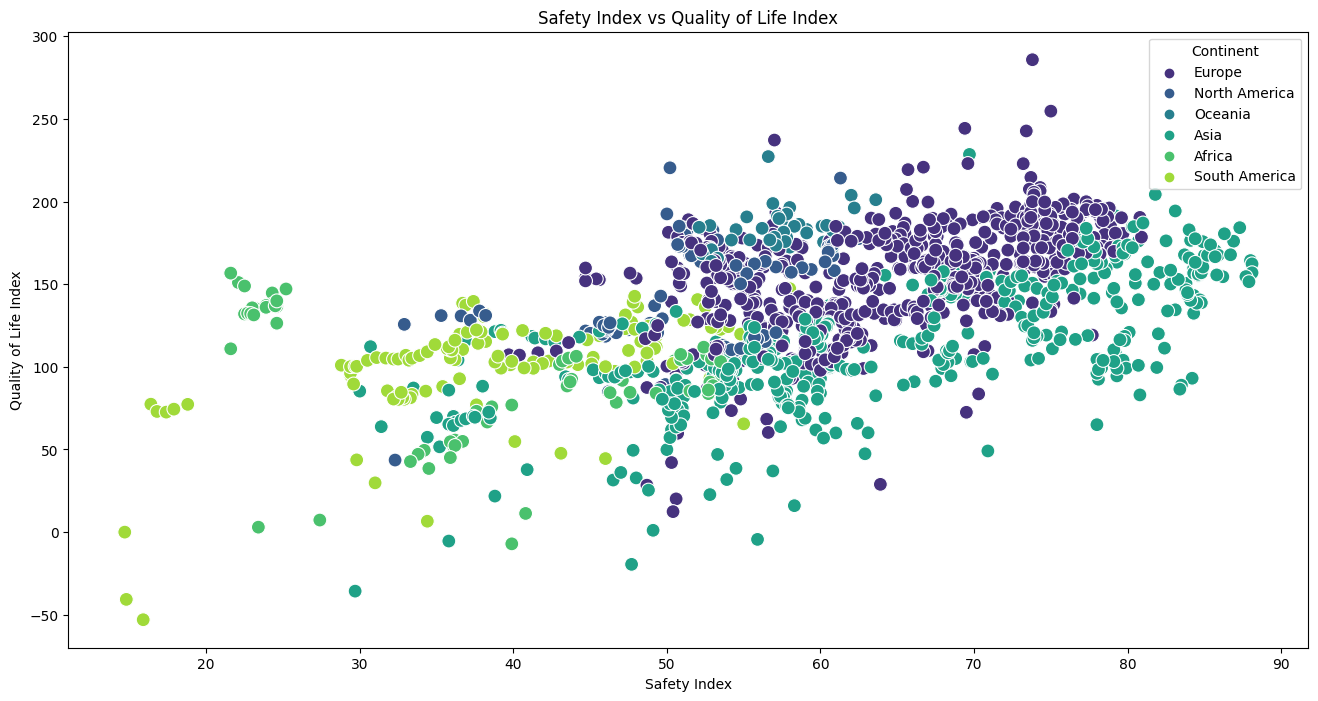

In [14]:
# Visualize the relationship between Safety Index and Quality of Life Index
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x='Safety Index', y='Quality of Life Index', data=df , hue='Continent', palette='viridis', s=100)
plt.title('Safety Index vs Quality of Life Index')
plt.show()

In [15]:
fig = px.choropleth(df, locations="Country", locationmode="country names",  
                    color="Safety Index", hover_name="Country",   
                    animation_frame="Year", color_continuous_scale="blues",
                    title="Safety Index by Country Over Time")
  



fig.show()

In [16]:
fig = px.choropleth(df, locations="Country", locationmode="country names",  
                    color="Pollution Index", hover_name="Country",    
                    animation_frame="Year", color_continuous_scale="blues",
                    title="Pollution Index by Country Over Time") 

fig.show()

In [17]:
fig = px.choropleth(df, locations="Country", locationmode="country names",  
                    color="Cost of Living Index", hover_name="Country",    
                    animation_frame="Year", color_continuous_scale="blues",
                    title="Cost of Living by Country Over Time") 



fig.show()

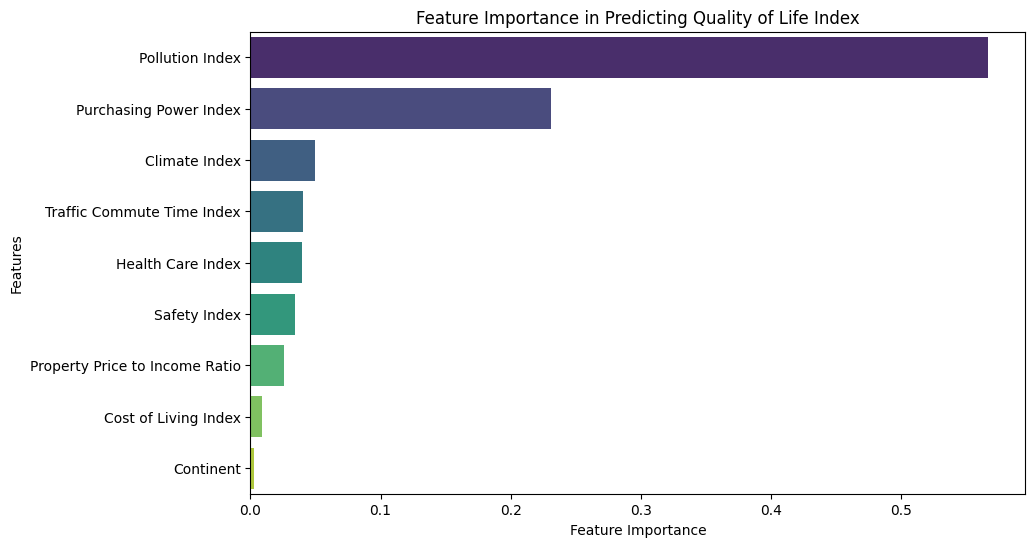

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Rank', 'Year', 'Country'])

# Convert 'Climate Index' to numeric (handle non-numeric values)
df_cleaned['Climate Index'] = pd.to_numeric(df_cleaned['Climate Index'], errors='coerce')

# Identify and encode categorical columns
df_cleaned = df_cleaned.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
df_cleaned_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Define features (X) and target variable (y)
X = df_cleaned_imputed.drop(columns=['Quality of Life Index'])
y = df_cleaned_imputed['Quality of Life Index']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Quality of Life Index")
plt.show()


The Quality of Life Index is primarily influenced by Pollution Index (57%) and Purchasing Power Index (23%), indicating that environmental conditions and economic well-being are the most critical factors. Climate, commute times, healthcare, and safety have a smaller but notable impact, while property affordability and cost of living play a minimal role. Interestingly, regional location (continent) is not a strong predictor, suggesting that economic and environmental conditions matter more than geography. Overall, reducing pollution and improving economic conditions appear to be the most effective ways to enhance quality of life.